# **User Rating Prediction Model**

The dataset used for this project merges multiple e-commerce sources into a single CSV. It contains user ratings and reviews for products, along with meta-information like user profile, product details, timestamps, and average helpfulness scores. Users can also express trust or distrust on others’ reviews.

The dataset is suitable for exploring user behavior, product evaluation, and recommendation systems.

During the course of the project, we would implement steps like data analysis, pre-processing and cleaning data and then concluding with a suitable model development. The goal is to develop a model to predict the user ratings based on some features.

 ## 1. **Data Analysis and Pre-processing**
 
In this part, we would perform some of the analysis on data like looking for Null values and identifying outliers etc. This process would be crucial for model development as well. 

In [ ]:
pip install seaborn matplotlib scikit-learn

In [38]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data set from the CSV file and checking if the file is read
data = pd.read_csv("F:\\Personal\\GitHub Projects\\User Rating Prediction\\E-Comerce DataSet.csv")
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB
None


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
5,33,30100,What is the &quot;Matrix&quot; Great Movie,Matrix,4.0,0.0,F,Movies,40,24.51,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
7,33,52800,E-commerce..what do I do???,PayPal,4.0,0.0,F,Personal Finance,52,38.00,31
8,33,52800,A man who remade himself..,Wendy's,5.0,0.0,F,Restaurants & Gourmet,84,69.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22


The information about the dataset can be seen above. The data set has different columns that represent different entities that can be involved in an e-commerce setup. The data set can be summarized to have the following major information

- **User information:** ID, gender, and city of birth
- **Product details:** name, category, ID, and price
- **Review information:** rating (1–5), text review, and average helpfulness score given by other users
- **Timestamp:** when the rating/review was submitted

The dataset shows that users can rate multiple items and items can receive multiple reviews. It is suitable for analyzing user behavior, review helpfulness, and developing recommendation systems. 

### **Removing Null Values**

Now that we know the basics about the data we have to perform some cleaning of the data as well. As per the description above, the following columns have the some Null values which need to be removed to proceed further in Data Analysis:

- Rating
- Gender
- Helpfulness

For simplicity, we would drop these entries as the amount of NULL values is not too much and would not effect the result considerably. As the result shows, Null Values have been removed.

In [39]:
# Removing the null values from the selected columns

cleaned_data = data.dropna(subset=['gender','rating','helpfulness']) 
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19934 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       19934 non-null  int64  
 1   timestamp    19934 non-null  int64  
 2   review       19934 non-null  object 
 3   item         19934 non-null  object 
 4   rating       19934 non-null  float64
 5   helpfulness  19934 non-null  float64
 6   gender       19934 non-null  object 
 7   category     19934 non-null  object 
 8   item_id      19934 non-null  int64  
 9   item_price   19934 non-null  float64
 10  user_city    19934 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.8+ MB


## **Outlier Analysis**

Once the Null values have been dealt with, the next step is to understand the distribution of the "rating" column with respect to different columns. In the next step we would analyze the distribution of data with respect to Gender and Category of Item. These items may also have the most impact on the rating as well.

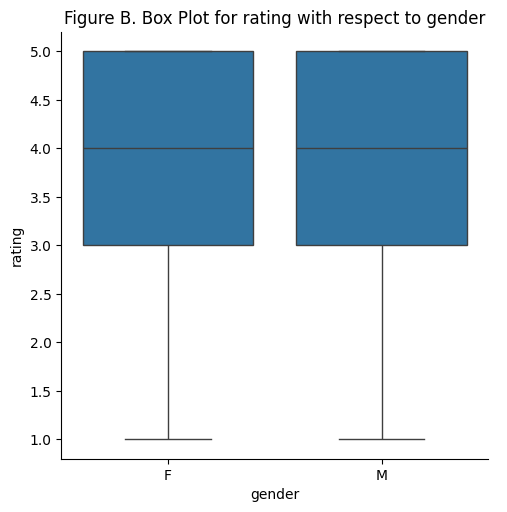

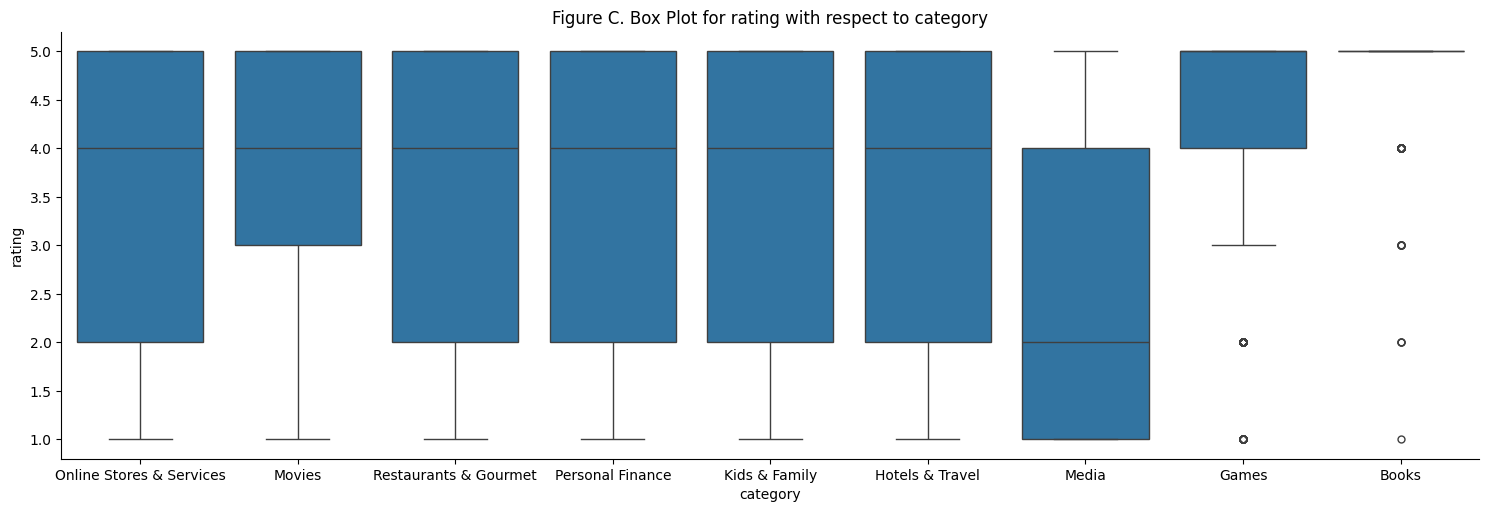

In [40]:

# Graph for  rating vs gender
sns.catplot(x='gender', y='rating', data=cleaned_data, kind='box')
plt.title('Figure B. Box Plot for rating with respect to gender')
plt.show()

# Graph for  category vs rating
sns.catplot(x='category', y='rating', data=cleaned_data, kind='box', aspect = 3)
plt.title('Figure C. Box Plot for rating with respect to category')
plt.show()

From the box plots above, it is quite evident that rating distribution with respect to the Gender is quite uniform. However, same cannot be said about different categories. Also, the categories of "Games" and "Books" show considerable outliers, which may effect the model's prediction.

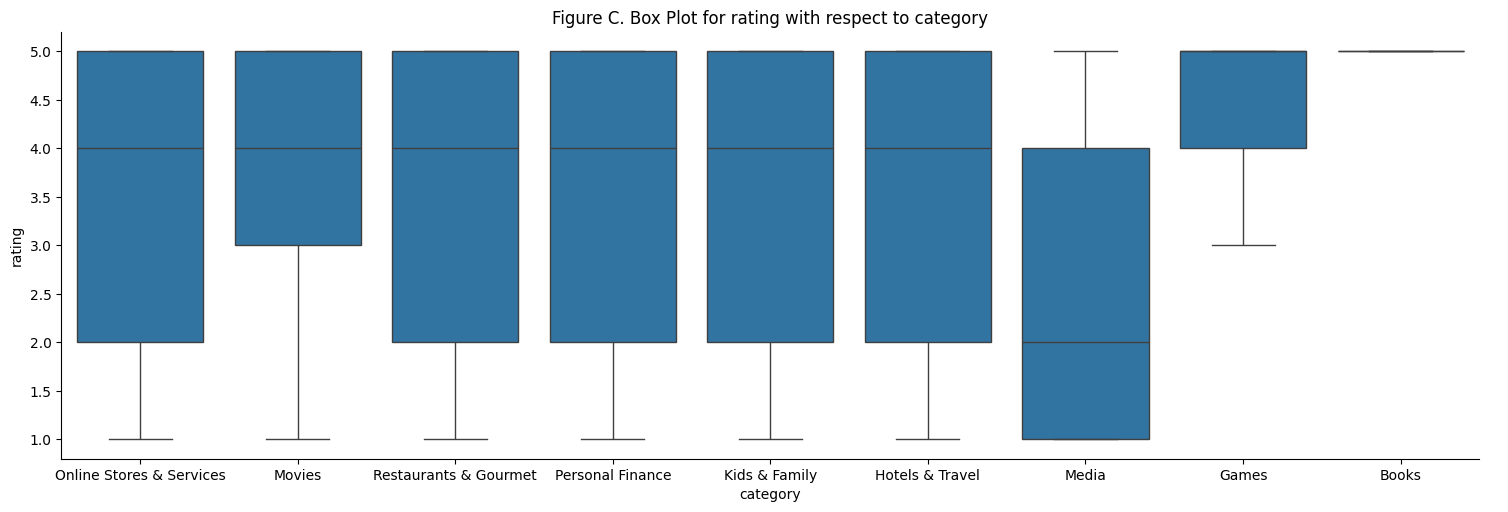

In [41]:
# Removing outliers in Category Games
cleaned_data = cleaned_data.drop(
    cleaned_data[(cleaned_data['category'] == 'Games') & (cleaned_data['rating'] < 3)].index
)

# Removing outliers in Category Books
cleaned_data = cleaned_data.drop(
    cleaned_data[(cleaned_data['category'] == 'Books') & (cleaned_data['rating'] <= 4)].index
)

# Graph for  category vs rating
sns.catplot(x='category', y='rating', data=cleaned_data, kind='box', aspect = 3)
plt.title('Figure C. Box Plot for rating with respect to category')
plt.show()

As from the above box plots, the outliers have been removed. This would make sure that the extreme values have no impact on predicting the user ratings.

## **Encoding Categorical Data**
The next step is to encode categorical data for further analysis. This can be used in tasks like co-relational analysis to help choose better features for the model prediction.

In [42]:
# Encoding Gender and Category First
cleaned_data['gender_code'] = pd.Categorical(cleaned_data['gender']).codes
cleaned_data['category_code'] = pd.Categorical(cleaned_data['category']).codes

cleaned_data[['gender', 'gender_code', 'category', 'category_code']].head()


,gender,gender_code,category,category_code
0,F,0,Online Stores & Services,6
1,F,0,Online Stores & Services,6
2,F,0,Online Stores & Services,6
3,F,0,Online Stores & Services,6
4,F,0,Movies,5


In [43]:
cleaned_data.groupby('rating').size()

rating
1.0    2392
2.0    2136
3.0    2403
4.0    4742
5.0    8123
dtype: int64

## 2. **Feature Analysis**
Now once the data has been organized, we would perform co-relational analysis to try and predict the co-relation between ratings and different columns. This would help us in choosing features

                 userId    rating  helpfulness   item_id  item_price  \
userId         1.000000 -0.010707    -0.043847  0.007000   -0.018401   
rating        -0.010707  1.000000    -0.001574  0.070546    0.015145   
helpfulness   -0.043847 -0.001574     1.000000 -0.015660    0.030971   
item_id        0.007000  0.070546    -0.015660  1.000000   -0.064610   
item_price    -0.018401  0.015145     0.030971 -0.064610    1.000000   
user_city     -0.009103 -0.010960     0.014180 -0.010070    0.001142   
gender_code   -0.009227 -0.010311     0.004885  0.011773   -0.008681   
category_code  0.032278 -0.148984    -0.042905 -0.087842   -0.070319   

               user_city  gender_code  category_code  
userId         -0.009103    -0.009227       0.032278  
rating         -0.010960    -0.010311      -0.148984  
helpfulness     0.014180     0.004885      -0.042905  
item_id        -0.010070     0.011773      -0.087842  
item_price      0.001142    -0.008681      -0.070319  
user_city       1.000

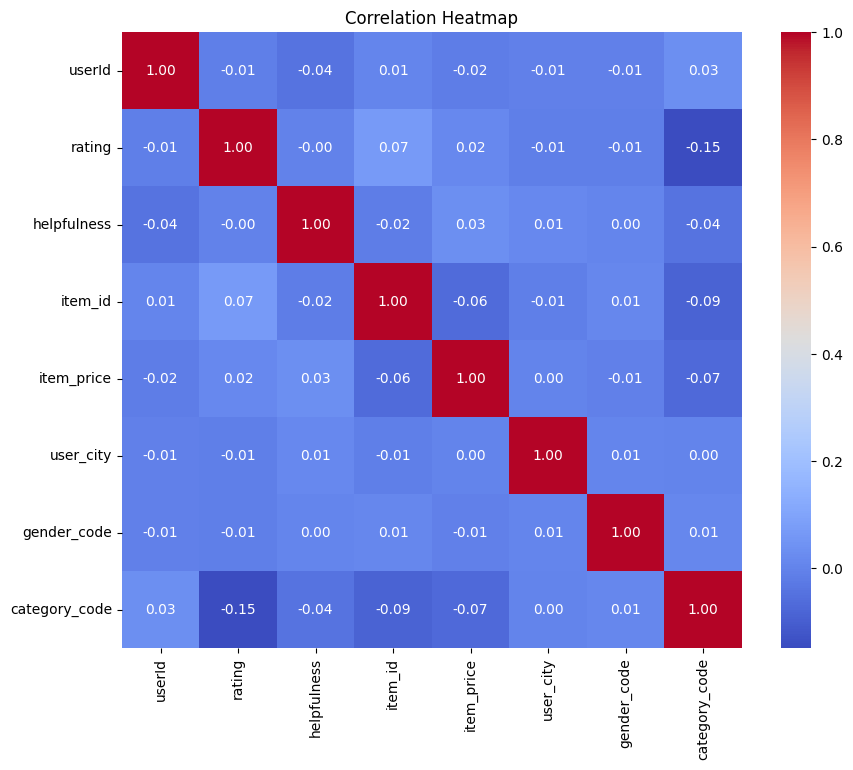

In [47]:
# Keeping only wanted columns and numeric columns
data_for_cor = cleaned_data.drop(columns=['timestamp', 'review', 'item','category','gender'])

# Computing co-relation of each column with every other column
corr_matrix = data_for_cor.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The analysis shows that ratings are largely independent of numeric features such as item_price and helpfulness in a linear sense. Among the features, product category has the most noticeable effect on ratings, although the correlation remains weak.

This suggests that linear models alone may not capture the complexity of rating behavior, especially if there are non-linear interactions between features. Tree-based models, such as Random Forest or Gradient Boosting, are well-suited for this dataset as they can handle both numeric and categorical features, capture non-linear relationships, and focus on the most important predictors. Linear regression could serve as a baseline, but is likely to underperform. Neural networks may be considered for larger datasets or more complex patterns, but for this dataset, tree-based models are the most practical choice.

## 3. **Model Development**
Now we move forward towards model development. The first task is to analyze the shape if the data is balanced or not. We would do that and then determine if balancing needs to be performed

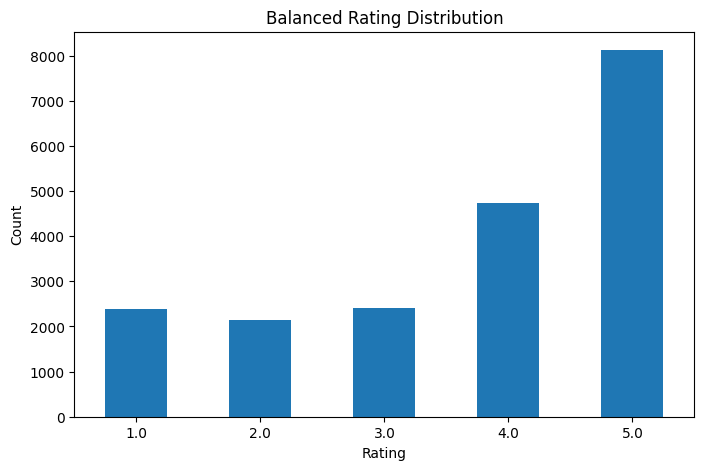

In [54]:
plt.figure(figsize=(8,5))
cleaned_data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Balanced Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

As we can see, the data is quite unbalanced with ratings 4 and 5 taking a lot of samples. This can introduce bias in the training as well. Hence, we would balance the data and train the model afterwards

In [56]:
# Inspect rating counts
rating_counts = cleaned_data['rating'].value_counts()

# Determine the minimum count across ratings
min_count = rating_counts.min()

# Undersample each rating class to the minimum count
balanced_data = cleaned_data.groupby('rating').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

print(balanced_data['rating'].value_counts())

rating
1.0    2136
2.0    2136
3.0    2136
4.0    2136
5.0    2136
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_26888\237691674.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = cleaned_data.groupby('rating').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


## **Random Forest Model**

As identified above, a linear model would be very low performing due to very little co-relation between rating and columns. Hence we choose Random Forest model which can learn non-linearities very well and can produce better results 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Choosing features
features = ['gender_code', 'category_code', 'item_price', 'helpfulness', 'item_id','user_city','userId','timestamp'] 
y = cleaned_data['rating']
X = cleaned_data[features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees grow fully
    min_samples_leaf=5,      # prevent overfitting
    random_state=42,
    n_jobs=-1                # use all cores
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 157   32   19   74  155]
 [  92   23   24  111  186]
 [  64   22   30  116  244]
 [  50   28   30  212  643]
 [  44   13   15  183 1393]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.39      0.36      0.37       437
         2.0       0.19      0.05      0.08       436
         3.0       0.25      0.06      0.10       476
         4.0       0.30      0.22      0.26       963
         5.0       0.53      0.85      0.65      1648

    accuracy                           0.46      3960
   macro avg       0.33      0.31      0.29      3960
weighted avg       0.39      0.46      0.40      3960

Accuracy: 0.4583333333333333


# **Conclusion**
The Random Forest model achieved an accuracy of 45.8% using the selected features. While the features contribute meaningfully to prediction, the moderate accuracy suggests the need for further improvements through advanced feature engineering, hyperparameter tuning, and addressing potential class imbalance.